In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
del df['Gender']
df

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

Purchased          0
EstimatedSalary    0
Age                0
User ID            0
dtype: int64

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
data = pd.DataFrame(scaled_data, columns = df.columns)
data.head()

,User ID,Age,EstimatedSalary,Purchased
0,-0.936579,-1.781797,-1.490046,-0.745936
1,1.668387,-0.253587,-1.460681,-0.745936
2,-0.320877,-1.113206,-0.785290,-0.745936
3,-1.233692,-1.017692,-0.374182,-0.745936
4,1.571389,-1.781797,0.183751,-0.745936


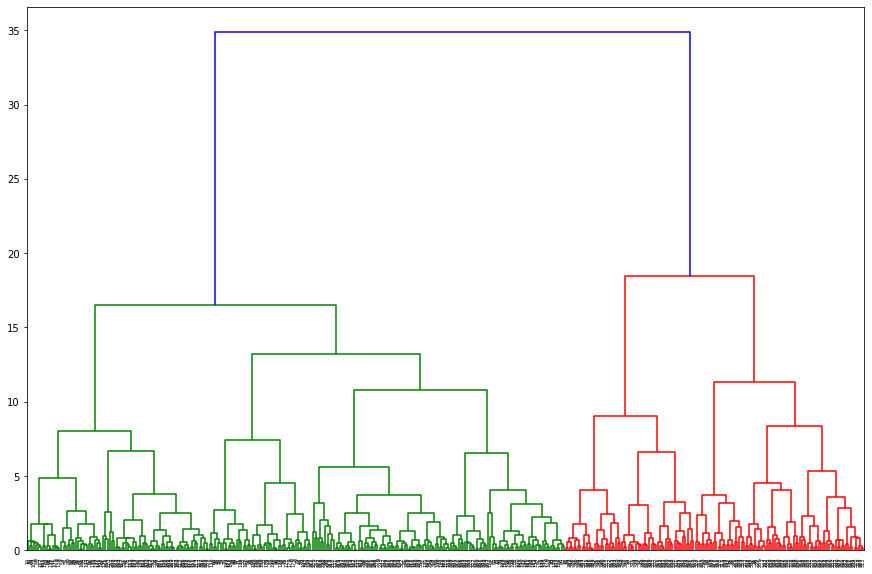

In [ ]:
plt.figure(figsize=(15,10))
dendrogram(linkage(data,method='ward'))
plt.show()

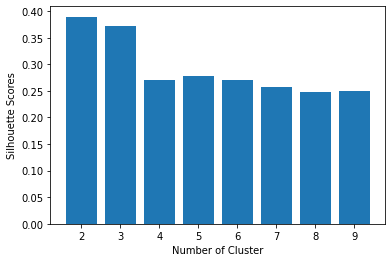

In [ ]:
silhouette_scores = []
for n_cluster in range(2,10) : silhouette_scores.append(silhouette_score(data, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of Cluster', fontsize = 10)
plt.ylabel('Silhouette Scores', fontsize = 10)
plt.show()

In [ ]:
agl = AgglomerativeClustering(n_clusters=3)
agl.fit(data)
labels = agl.labels_
hasil_agl = pd.concat([data,pd.DataFrame({'cluster':labels})], axis=1)
hasil_agl.head()

,User ID,Age,EstimatedSalary,Purchased,cluster
0,-0.936579,-1.781797,-1.490046,-0.745936,0
1,1.668387,-0.253587,-1.460681,-0.745936,0
2,-0.320877,-1.113206,-0.785290,-0.745936,0
3,-1.233692,-1.017692,-0.374182,-0.745936,0
4,1.571389,-1.781797,0.183751,-0.745936,0


In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

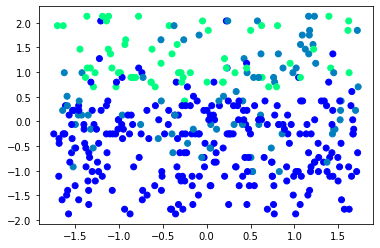

In [ ]:
plt.scatter(data['User ID'], data['Age'],   
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(data), cmap =plt.cm.winter) 
plt.show() 